# Data Wrangling Udacity Project
###### Muhammad Ariq Farhansyah Mutyara
## Introduction
WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.
So is there any interest fact from this twitter account? What is the most and least rated dog type? What is the most and least favorite dog type? What is the most common dog type occured? or is there any kind of relationship between retweeted tweet and favorite tweet? Let us find out 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_type,conf_rate,retweet_count,favorite_count
0,667550904950915073,2015-11-20 03:51:52,RT @dogratingrating: Exceptional talent. Origi...,https://twitter.com/dogratingrating/status/667...,12,10,None,None,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,vizsla,0.000081,31.0,0.0
1,667550882905632768,2015-11-20 03:51:47,RT @dogratingrating: Unoriginal idea. Blatant ...,https://twitter.com/dogratingrating/status/667...,5,10,None,None,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,None,0.000000,31.0,0.0
2,667549055577362432,2015-11-20 03:44:31,Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,None,0.000000,2112.0,5476.0
3,667546741521195010,2015-11-20 03:35:20,Here is George. George took a selfie of his ne...,https://twitter.com/dog_rates/status/667546741...,9,10,George,None,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,toy_poodle,0.787424,115.0,322.0
4,667544320556335104,2015-11-20 03:25:43,"This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,10,10,Kial,None,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,pomeranian,0.412893,493.0,813.0


### 1. The 10 Most and Least Average Rated Dog Type

In [2]:
df['rate'] = df['rating_numerator'] / df['rating_denominator']
df_rate_dog = df[df['dog_type'] != 'None'][['dog_type', 'rate']].groupby('dog_type').mean()
df_rate_dog = df_rate_dog.sort_values(by='rate', ascending=False)
df_rate_dog.head(10)

,rate
dog_type,
clumber,2.700000
bouvier_des_flandres,1.300000
saluki,1.250000
pomeranian,1.247619
briard,1.233333
tibetan_mastiff,1.225000
irish_setter,1.220000
border_terrier,1.214286
silky_terrier,1.200000


In [3]:
df_rate_dog.tail(10).sort_values(by='rate', ascending=True)

,rate
dog_type,
japanese_spaniel,0.500000
soft-coated_wheaten_terrier,0.880000
scotch_terrier,0.900000
walker_hound,0.900000
tibetan_terrier,0.925000
dalmatian,0.933333
boston_bull,0.941667
welsh_springer_spaniel,0.950000
maltese_dog,0.952632


In this data we can see that based on average rate on dog type, the most rated one is Clumber with average rate 2.7, and unfortunately the Japanese Spaniel has the least rated dog with average rating just 0.5

### 2. The 10 Most and Least Average Favorite Dog Type

In [4]:
df_fav_dog = df[df['dog_type'] != 'None'][['dog_type', 'favorite_count']].groupby('dog_type').mean()
df_fav_dog = df_fav_dog.sort_values(by='favorite_count', ascending=False)
df_fav_dog.head(10)

,favorite_count
dog_type,
bedlington_terrier,22773.333333
saluki,22006.750000
french_bulldog,17104.137931
bouvier_des_flandres,16301.000000
black-and-tan_coonhound,15506.500000
flat-coated_retriever,15339.250000
irish_water_spaniel,14832.000000
leonberg,13447.666667
whippet,13366.272727


In [5]:
df_fav_dog.tail(10).sort_values(by='favorite_count', ascending=True)

,favorite_count
dog_type,
brabancon_griffon,797.333333
groenendael,1042.500000
japanese_spaniel,1202.000000
irish_wolfhound,1372.000000
tibetan_terrier,1661.250000
standard_schnauzer,1816.000000
scottish_deerhound,2056.750000
papillon,2242.714286
basenji,2250.777778


Based on average favorite on dog type, the most favorite one is Bedlington Terrier with more than 22 thousand on average favorite count, this is different from the most rated one which is clumber is the winner there. And for the least favorite one is Brabancon Griffon with just less than 800 average favorite count. The interesting part is, the Japanese Spaniel, the least rated dog, is the third on the least favorite dog type with just over thousand average favorite count

### 3. Is There any Correlation between Retweet and Favorite Count??

In [8]:
print('Correlation between retweet count and favorite count : ' + str(df.corr().loc['retweet_count', 'favorite_count']))

Correlation between retweet count and favorite count : 0.80182325962


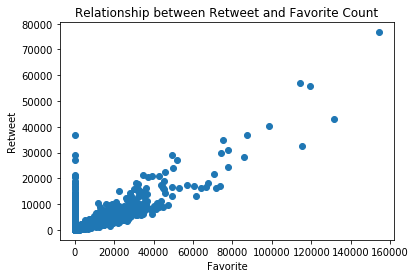

In [9]:
plt.scatter(df['favorite_count'], df['retweet_count'])
plt.title('Relationship between Retweet and Favorite Count')
plt.xlabel('Favorite')
plt.ylabel('Retweet');

There is a strong indication that retweet count and favorite count has positive correlation with +0.8 correlation coefficient and the scatter plot represents it even though not too strong enough to make a clear conclusion on this one.

### 4. The 10 Most Common Dog Type

In [10]:
df_dog_type = df[df['dog_type'] != 'None'].dog_type.value_counts()
df_dog_type = df_dog_type[:10]
df_dog_type

golden_retriever      158
labrador_retriever    105
pembroke               94
chihuahua              89
pug                    63
toy_poodle             50
chow                   48
pomeranian             42
samoyed                41
malamute               33
Name: dog_type, dtype: int64

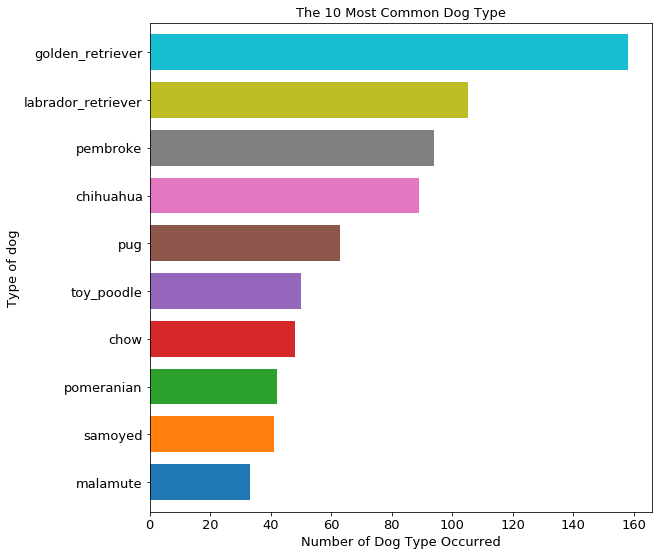

In [12]:
df_dog_type.sort_values(ascending=True).plot.barh(fontsize=13, figsize=(9, 9), width=0.75)
plt.title("The 10 Most Common Dog Type", fontsize=13)
plt.xlabel('Number of Dog Type Occurred', fontsize=13)
plt.ylabel('Type of dog', fontsize=13);

From this visualization is we know that the Golden Retriever is the most common type of dogs with more than 140 occurred in WeRateDogs tweet.